In [1]:
import nengo
from nengo.utils.matplotlib import rasterplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nengo_learn_assoc_mem.learning_rules.fake_voja import FakeVoja

In [2]:
def cycle_array(x, period, dt=0.001):
    """Cycles through the elements"""
    i_every = int(round(period / dt))
    if i_every != period / dt:
        raise ValueError("dt (%s) does not divide period (%s)" % (dt, period))

    def f(t):
        i = int(round((t - dt) / dt))  # t starts at dt
        return x[int(i / i_every) % len(x)]

    return f

In [41]:
dims = 2
n_neurons = 10
seed = 2
intercepts = [0.9]*n_neurons

In [48]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

with nengo.Simulator(model) as sim:
    pass

enc = sim.data[ens].encoders
fake_voja = FakeVoja(enc, learning_rate=1e-3)

Building finished in 0:00:01.                                                   


In [49]:
with nengo.Network() as model:
    in_nd = nengo.Node(cycle_array([[1, 1], [-1, -1]], 0.1))

    voja_nd = nengo.Node(fake_voja.encode, size_in=dims+n_neurons)
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

    nengo.Connection(in_nd, voja_nd[:dims], synapse=None)
    nengo.Connection(ens.neurons, voja_nd[dims:])
    nengo.Connection(voja_nd, ens.neurons, synapse=None)

    p_in = nengo.Probe(in_nd, synapse=0.01)
    p_spikes = nengo.Probe(ens.neurons)

with nengo.Simulator(model) as sim:
    sim.run(1)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


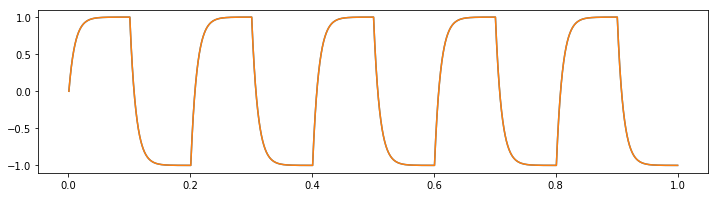

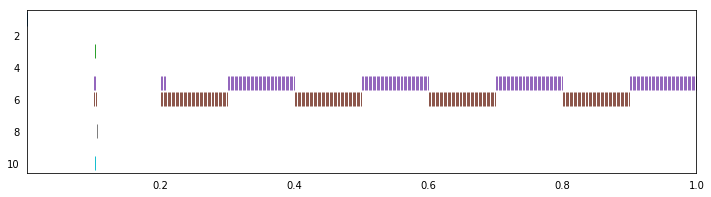

In [50]:
plt.figure(figsize=(12, 3))
plt.plot(sim.trange(), sim.data[p_in])

plt.figure(figsize=(12, 3))
rasterplot(sim.trange(), sim.data[p_spikes])

In [51]:
x_val = np.linspace(0, 2*np.pi, 50)
circ = np.array([np.cos(x_val), np.sin(x_val)]).T

enc_h = fake_voja.encoder_hist

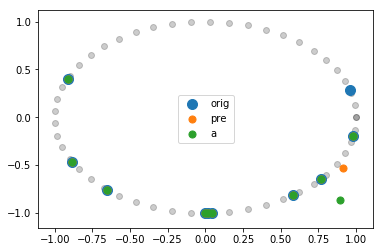

In [60]:
plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
win_pre = 10
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
win_a = 100
plt.scatter(enc_h[win_a][:, 0], enc_h[win_a][:, 1], label="a", s=50)

plt.legend()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

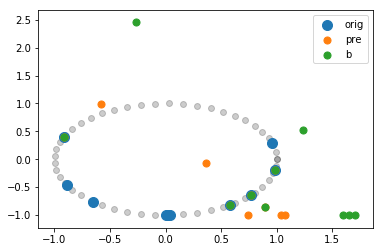

In [64]:
plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
win_pre = 110
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
win_b = 200
plt.scatter(enc_h[win_b][:, 0], enc_h[win_b][:, 1], label="b", s=50)

plt.legend()